In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Task 1- EDA

In [2]:
# Load Dataset & EDA
data_path = "Pharma_Industry.csv"
df = pd.read_csv(data_path)

In [9]:
print("First 5 rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
display(df.describe())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows:


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB
None

Statistical Summary:


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000



Missing Values:
Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64


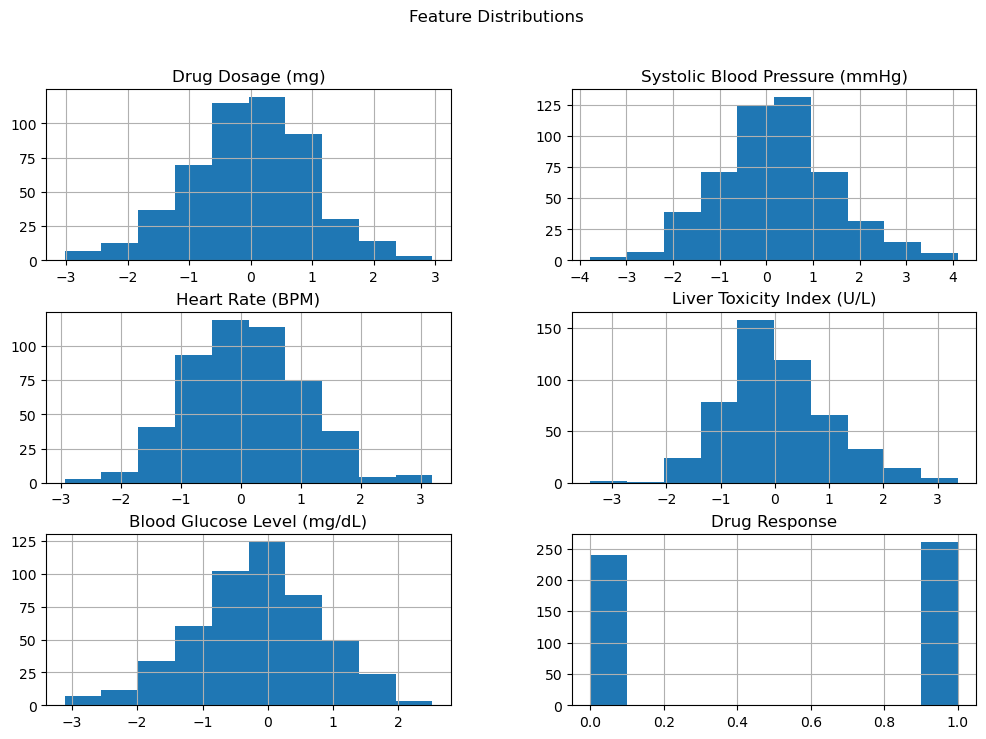

In [10]:
# Histograms
df.hist(figsize=(12,8))
plt.suptitle("Feature Distributions")
plt.show()

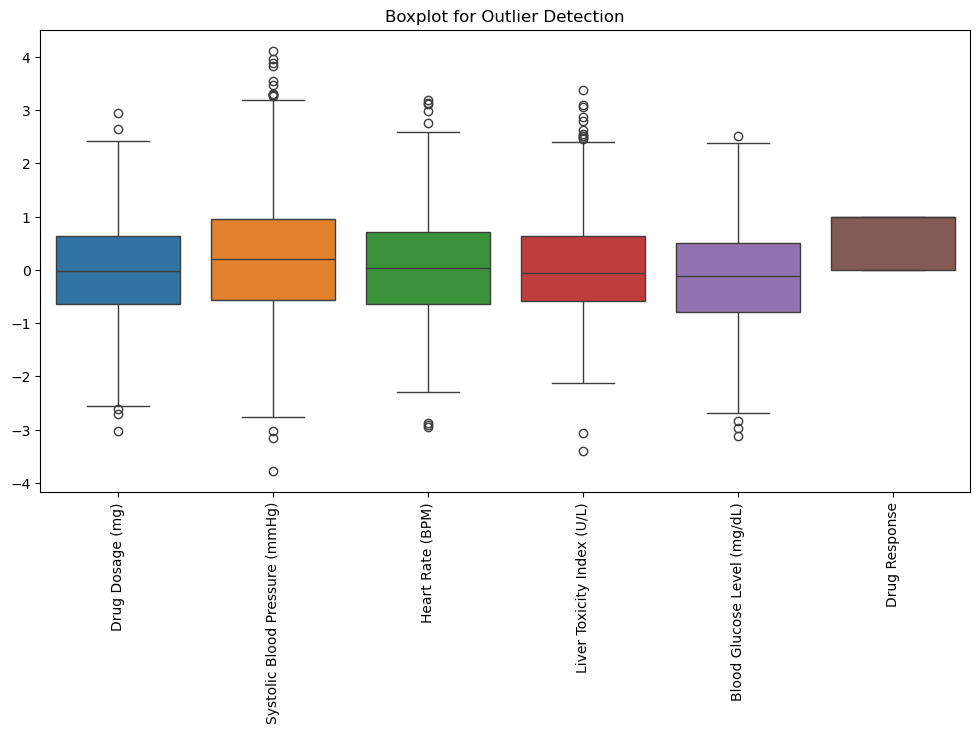

In [11]:
# Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

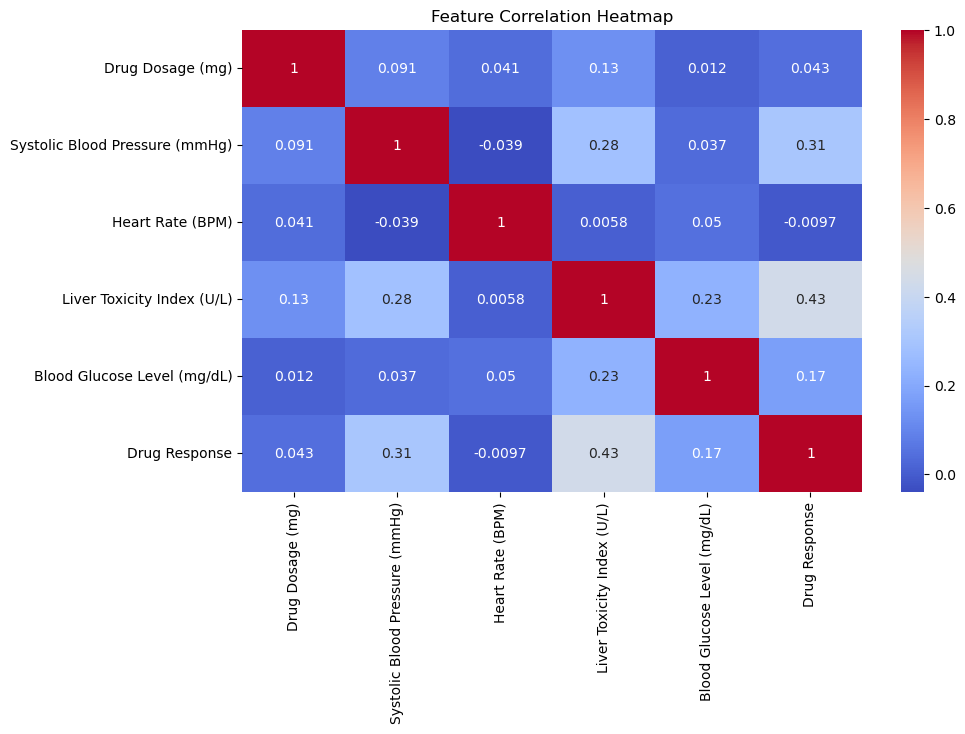

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

### Task 2- Data Preprocessing

In [13]:
# Encode categorical columns if present
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [14]:
# Define features and target
# Assuming last column is target (Drug Response: 0/1)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [16]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Task 3- Data Visualization

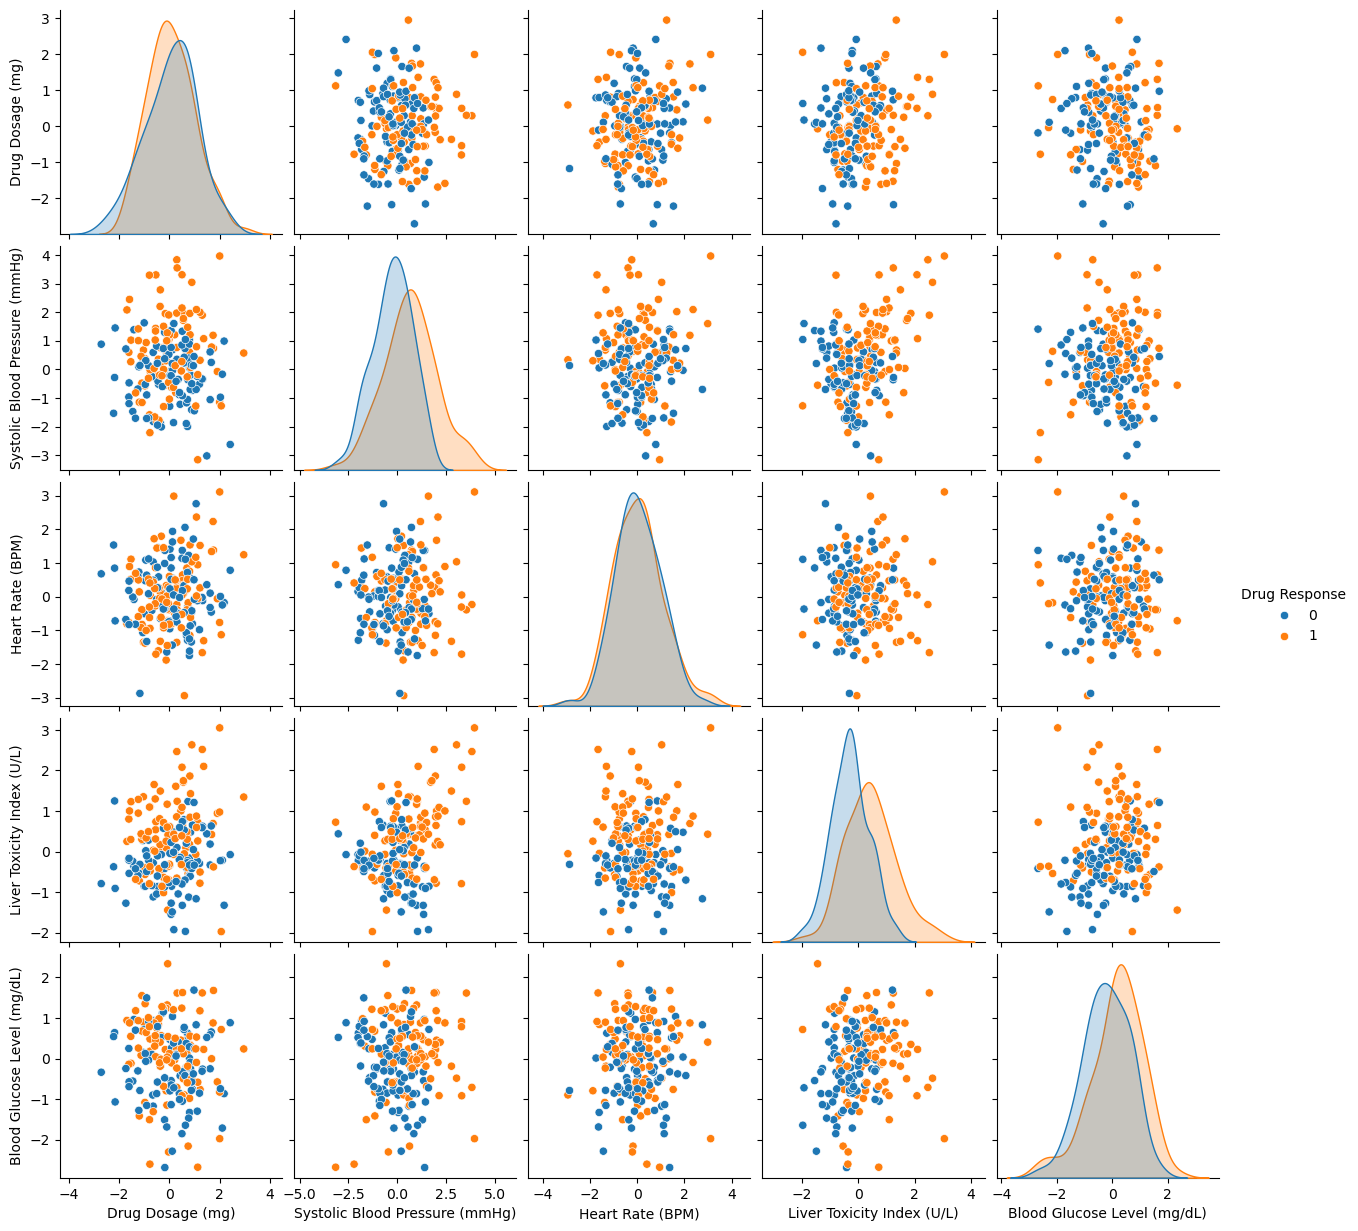

In [17]:
# Pairplot
sample_df = df.sample(min(200, len(df)))
sns.pairplot(sample_df, hue=df.columns[-1])
plt.show()

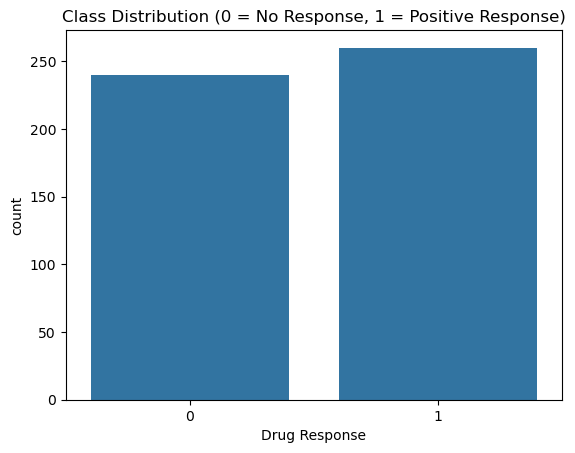

In [18]:
# Class distribution
sns.countplot(x=y)
plt.title("Class Distribution (0 = No Response, 1 = Positive Response)")
plt.show()

### Task 4- SVM Implementation

In [19]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("\nBasic Linear SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Basic Linear SVM Performance:
Accuracy: 0.728

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        60
           1       0.77      0.68      0.72        65

    accuracy                           0.73       125
   macro avg       0.73      0.73      0.73       125
weighted avg       0.73      0.73      0.73       125



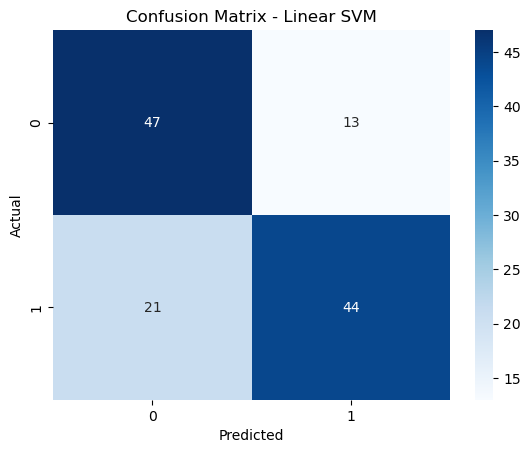

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Task 5-  Visualization of SVM Results

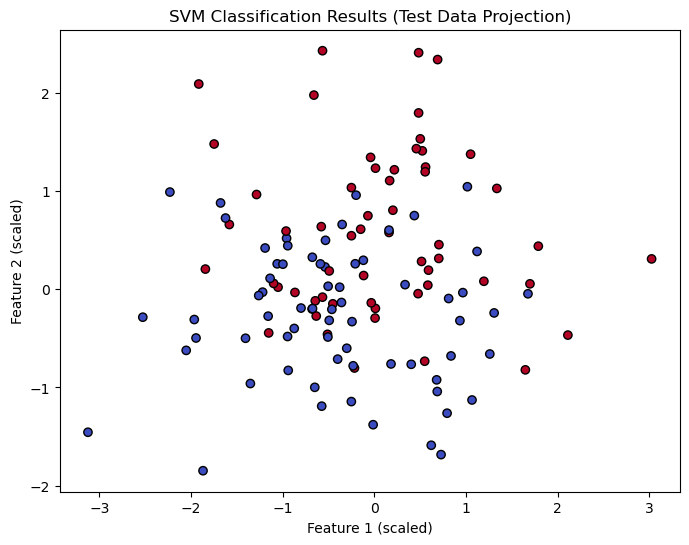

In [21]:
#visualization using first two features
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title("SVM Classification Results (Test Data Projection)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

In [22]:
# Task 6-Parameter Tuning and Optimization
param_grid = {
    'C':[0.1,1,10],
    'kernel':['linear','rbf','poly'],
    'gamma':['scale','auto']
}

In [23]:
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [24]:
print("\nBest Parameters from GridSearch:")
print(grid.best_params_)


Best Parameters from GridSearch:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [25]:
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)

print("\nOptimized SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Optimized SVM Performance:
Accuracy: 0.752
              precision    recall  f1-score   support

           0       0.75      0.72      0.74        60
           1       0.75      0.78      0.77        65

    accuracy                           0.75       125
   macro avg       0.75      0.75      0.75       125
weighted avg       0.75      0.75      0.75       125



### Task 7- Comparision and Analysis

In [26]:
kernels = ['linear','poly','rbf']
kernel_results = {}

for k in kernels:
    model = SVC(kernel=k, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    kernel_results[k] = acc

In [27]:
print("\nKernel Comparison Accuracy:")
for k,v in kernel_results.items():
    print(f"{k} kernel accuracy: {v:.4f}")


Kernel Comparison Accuracy:
linear kernel accuracy: 0.7280
poly kernel accuracy: 0.6880
rbf kernel accuracy: 0.7520


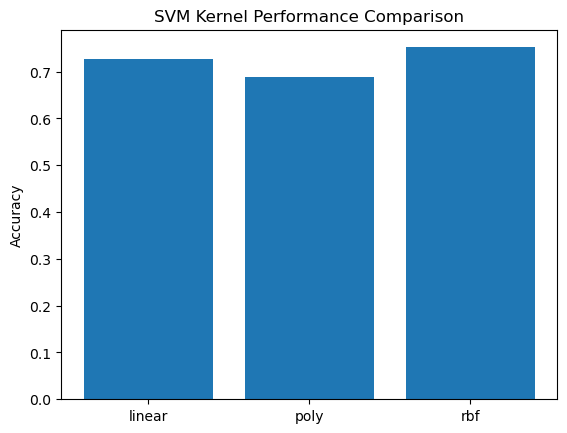

In [28]:
# Bar plot for kernel comparison
plt.bar(kernel_results.keys(), kernel_results.values())
plt.title("SVM Kernel Performance Comparison")
plt.ylabel("Accuracy")
plt.show()